In [58]:
# Make the system able to find the components library = components.py file
import importlib
import os
import sys
sys.path.insert(0, os.path.abspath('.'))

# Import the most recent version of the components library
import model
importlib.reload(model)
from model import *

import components
importlib.reload(components)
from components import *

In [59]:
H = Model(config_file='general_config_file.yaml', elements_list='elements_list.yaml')
H.initialize_hubs()
H.build_environment_level_variables_and_constraints(log=False)
H.connect_environments(log=False)
H.add_hubs_equations_to_model(log=False)
H.solve()

Problem solved with status: Optimal


100%|██████████| 168/168 [00:00<00:00, 9959.06it/s]


In [43]:
H.get_design(components=['car_battery', 'home_battery', 'trailer_battery', 'PV'],
             factors=['volume_factor', 'volume_factor', 'volume_factor', 'factor'],
   
             units=['kWh', 'kWh', 'kWh', 'kWhc'])


,car_battery (kWh),home_battery (kWh),trailer_battery (kWh),PV (kWhc)
volume_factor,8.824977,0.0,11.0,NaN
factor,NaN,NaN,NaN,5.831758


In [44]:
H.objective_value

75.1489739265308

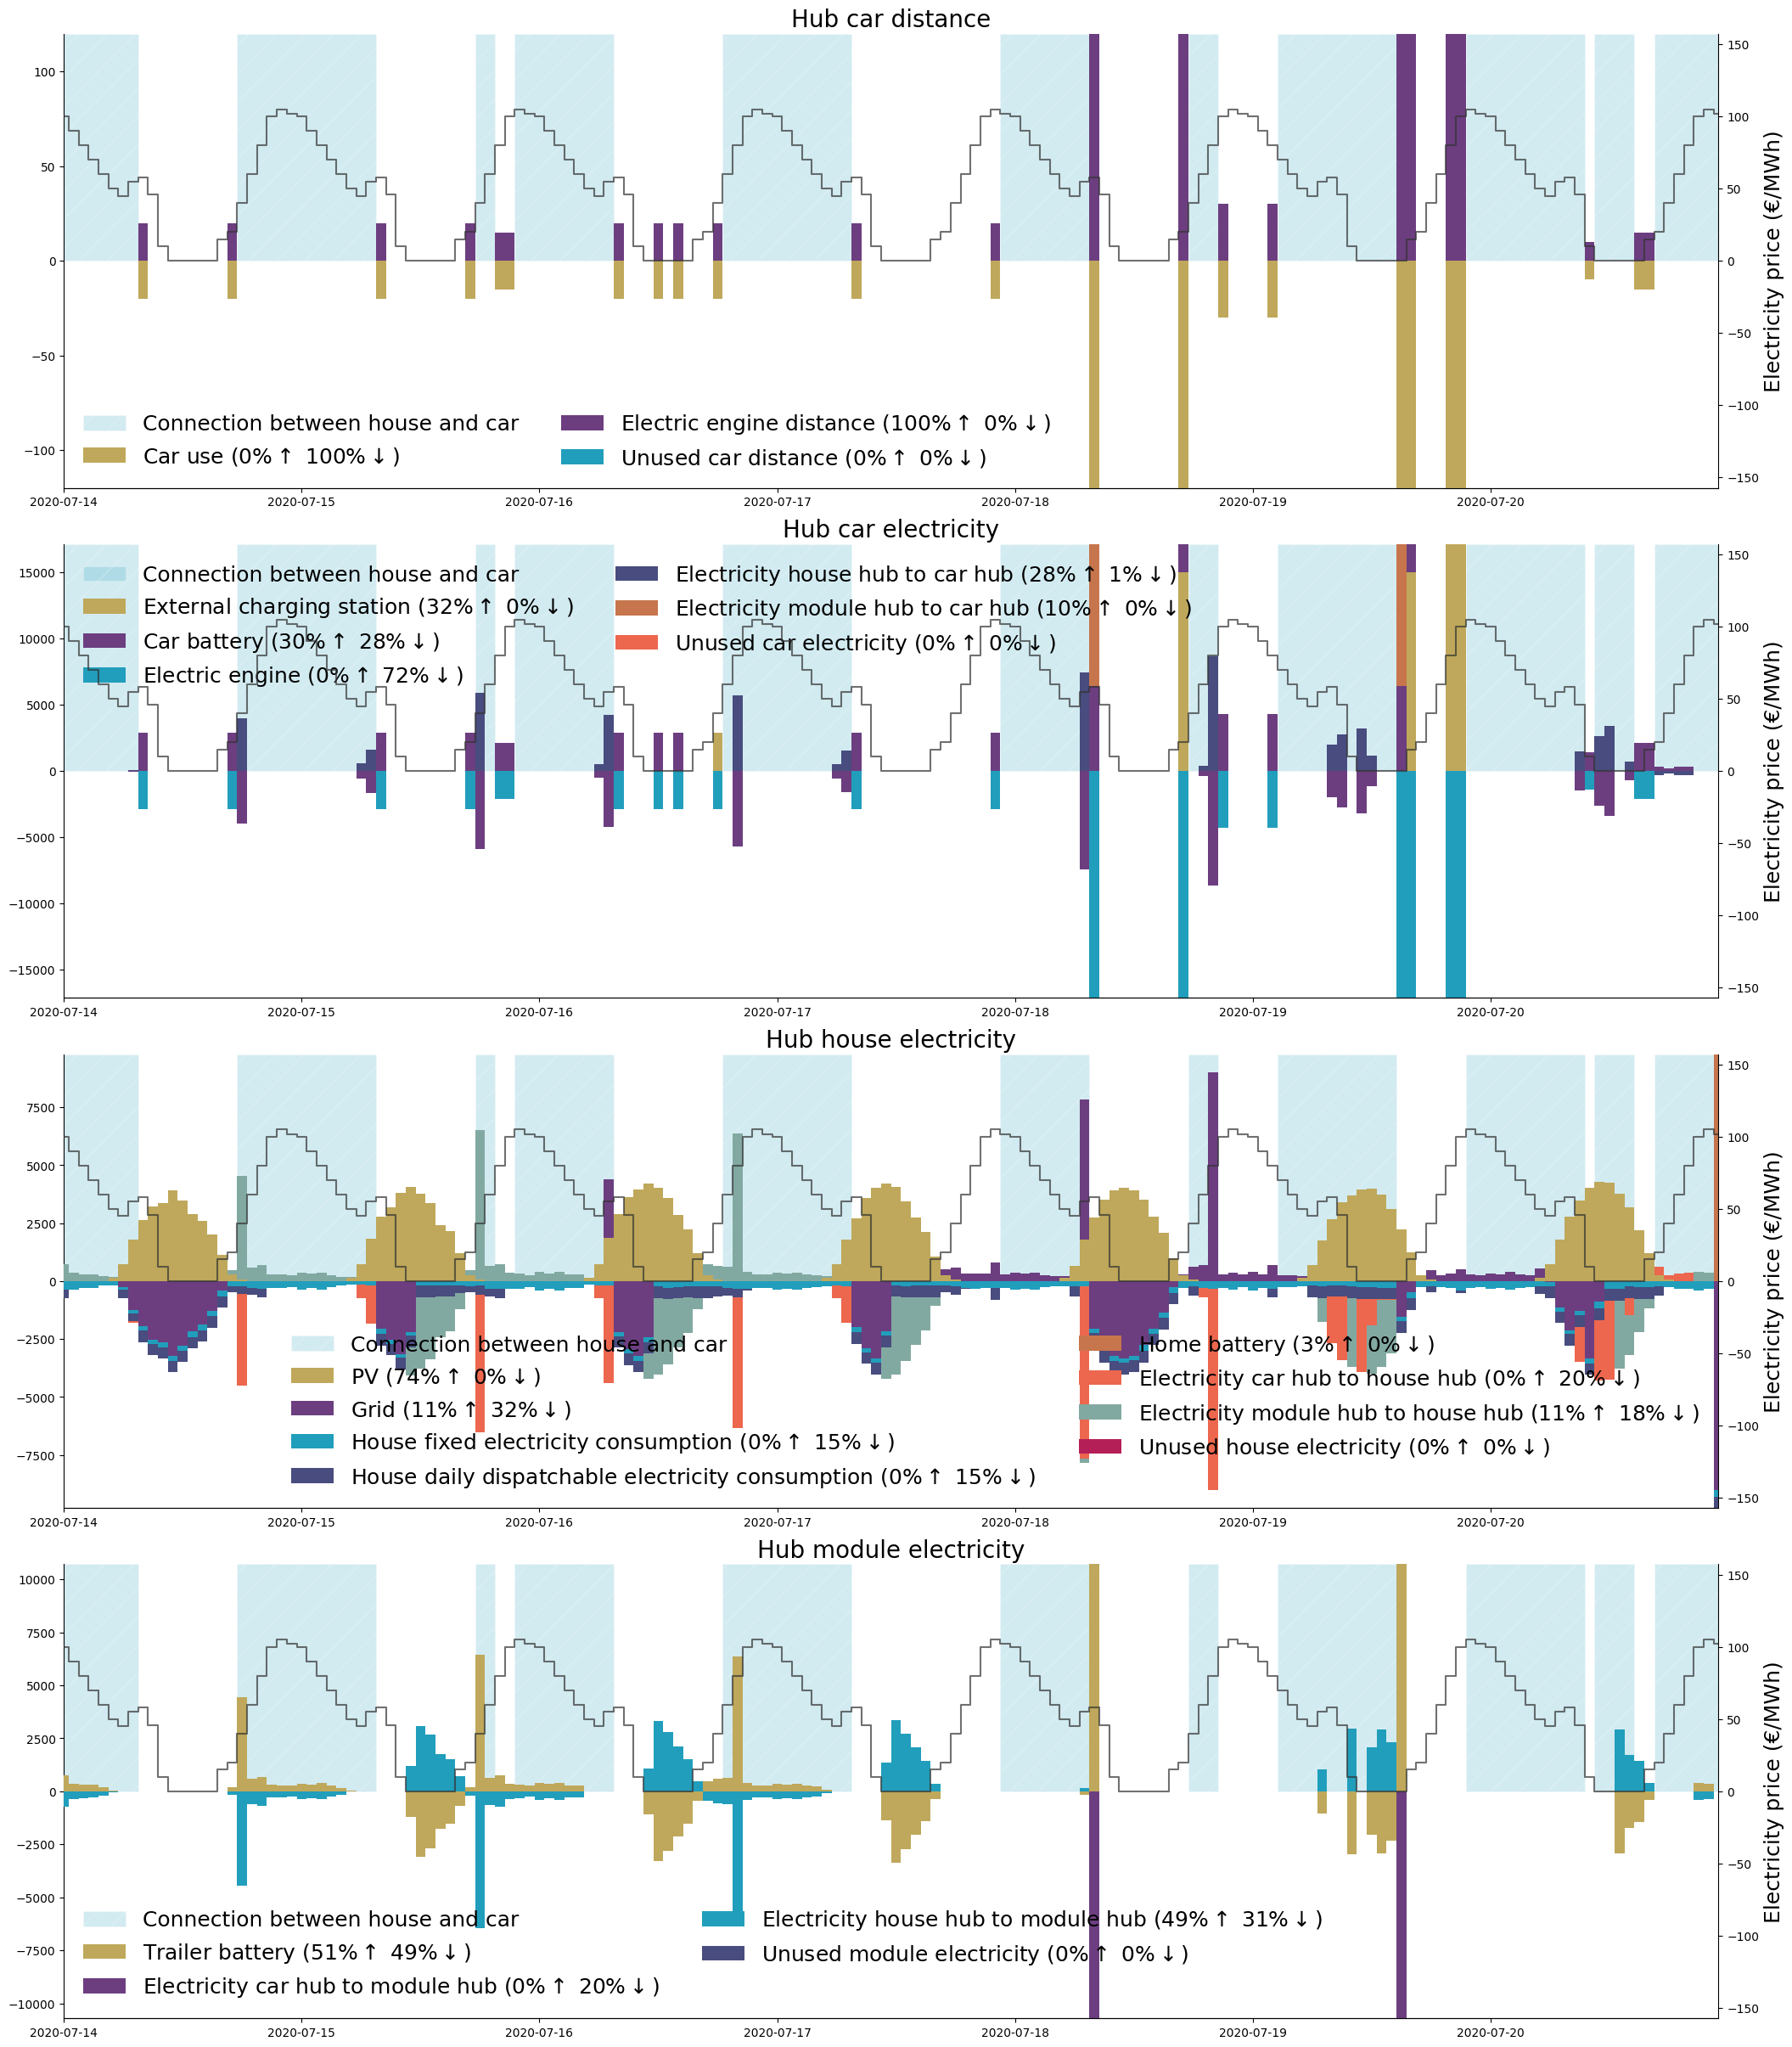

In [57]:
H.plot_hubs(co=True, env1='house', env2='car', price=('data_sample.csv//Electricity_price (euros/MWh)', 'Electricity price (€/MWh)'))

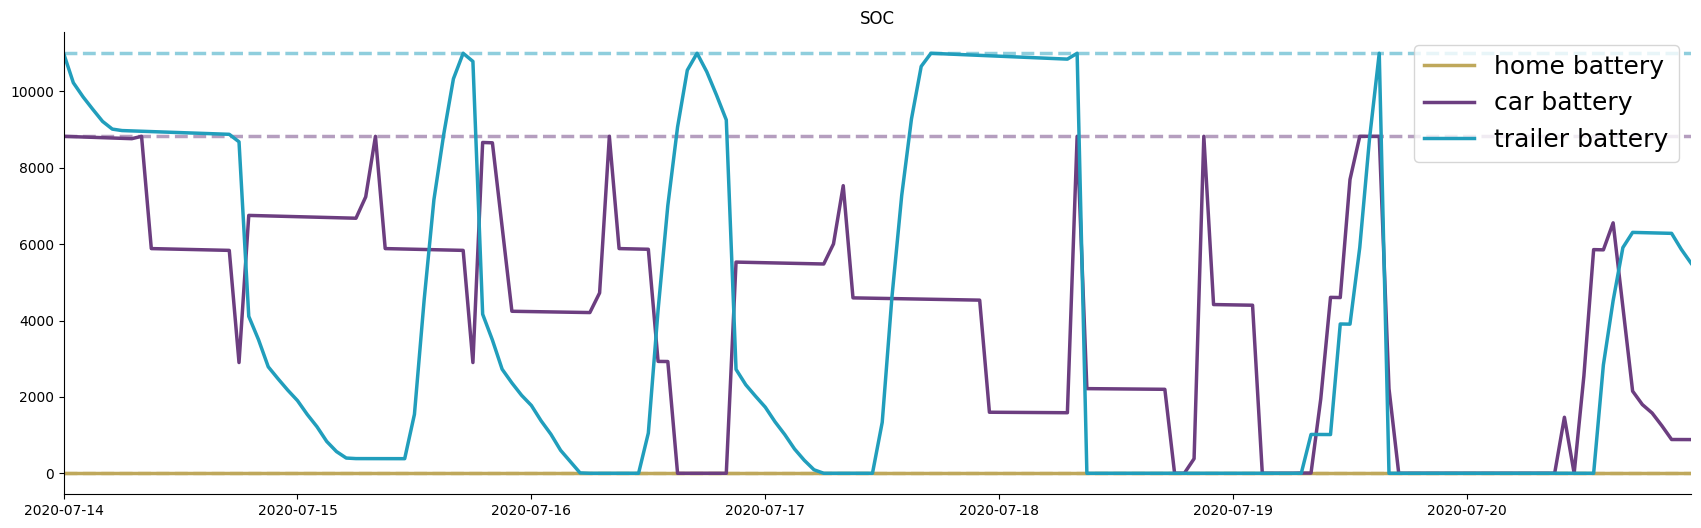

In [45]:
H.plot_SOC()